In [14]:
library(rhdf5)
library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)

chr = 1
higashi_summary = fread("/Duan2020/duan2020_summary.txt")
cells = paste("cell_", 0:9229, sep = "")
coordinates = t(h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                              chr, "_duan_embed_nbr_3_impute.hdf5"), "coordinates"))
higashi_summary$outlier = 0
higashi_summary$outlier2 = 0
for (i in 1:9230){
    values = h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                           chr, "_duan_embed_nbr_3_impute.hdf5"), cells[i])
    temp = cbind(coordinates, values)
    temp = data.frame(temp)
    temp = temp %>% mutate_at(c("V1", "V2", "values"), as.numeric) %>% rename(binA = V1, binB = V2, count = values)
    higashi_summary$outlier[i] = sum(temp[temp$binA > 7 & temp$binA < 12 & temp$binB > 109 & temp$binB < 114, ]$count)
    higashi_summary$outlier2[i] = sum(temp[temp$binA > 13 & temp$binA < 18 & temp$binB > 109 & temp$binB < 114, ]$count)
}
h5closeAll()
higashi_summary = higashi_summary[, 1:7]

In [97]:
options(scipen = 200)

which(higashi_summary$name == "human_10993_TACACCGG-TCAGATGC_500000.matrix")

library(rhdf5)
library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)

chr = 1
higashi_summary = fread("/Duan2020/duan2020_summary.txt")
cells = paste("cell_", 0:9229, sep = "")
coordinates = t(h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                              chr, "_duan_embed_nbr_3_impute.hdf5"), "coordinates"))
higashi_summary$outlier = 0
higashi_summary$outlier2 = 0
i = 154
values = h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                       chr, "_duan_embed_nbr_3_impute.hdf5"), cells[i])
temp = data.frame(cbind(coordinates, values))
temp$V1 = temp$V1 * 1000000
temp$V2 = temp$V2 * 1000000
write.table(data.frame(0, "chr1", temp$V1, 0, 1, "chr1", temp$V2, 1, temp$values), 
            file = paste0("/BandNormPaper/Higashioutlier/higashi.bed"), row.names = FALSE,
            col.names = FALSE, quote = FALSE, sep = "\t")
h5closeAll()

[1] 154

In [98]:
convert_bam_to_wig <- "java -jar /u/s/s/sshen82/Rfile/juicerdir/scripts/common/juicer_tools.jar pre -r 1000000 /BandNormPaper/Higashioutlier/higashi.bed /BandNormPaper/Higashioutlier/higashi.hic /u/s/s/sshen82/Rfile/juicerdir/references/hg19.chrom.sizes"
#print(convert_bam_to_wig)
system(convert_bam_to_wig)

In [ ]:
which(higashi_summary$name == "human_10993_TACACCGG-TCAGATGC_500000.matrix")

library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)

chr = 1
higashi_summary = fread("/Duan2020/duan2020_summary.txt")
i = 154
temp = fread("/Duan2020/Counts_1mb/GM12878/human_10993_TACACCGG-TCAGATGC_500000.matrix")[V1 == "chr1"]
write.table(data.frame(0, "chr1", temp$V2, 0, 1, "chr1", temp$V4, 1, temp$V5), 
            file = paste0("/BandNormPaper/Higashioutlier/raw.bed"), row.names = FALSE,
            col.names = FALSE, quote = FALSE, sep = "\t")

In [11]:
which(higashi_summary$name == "human_10993_TACACCGG-TCAGATGC_500000.matrix")

library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)

chr = 1
higashi_summary = fread("/Duan2020/duan2020_summary.txt")
i = 154
temp = fread("/Duan2020/Counts_1mb/GM12878/human_10993_TACACCGG-TCAGATGC_500000.matrix")[V1 == "chr1"]
write.table(data.frame(0, "chr1", temp$V2, 0, 1, "chr1", temp$V4, 1, temp$V5), 
            file = paste0("/BandNormPaper/Higashioutlier/raw.bed"), row.names = FALSE,
            col.names = FALSE, quote = FALSE, sep = "\t")

[1] 154

In [100]:
convert_bam_to_wig <- "java -jar /u/s/s/sshen82/Rfile/juicerdir/scripts/common/juicer_tools.jar pre -r 1000000 /BandNormPaper/Higashioutlier/raw.bed /BandNormPaper/Higashioutlier/raw.hic /u/s/s/sshen82/Rfile/juicerdir/references/hg19.chrom.sizes"
#print(convert_bam_to_wig)
system(convert_bam_to_wig)

In [10]:
emb = fread("/BandNormPaper/paper_prep/01072022/embeddings/Kim2020_higashi.csv")
library(umap)
library(ggplot2)
higashi_summary = cbind(higashi_summary, umap(emb)$layout)

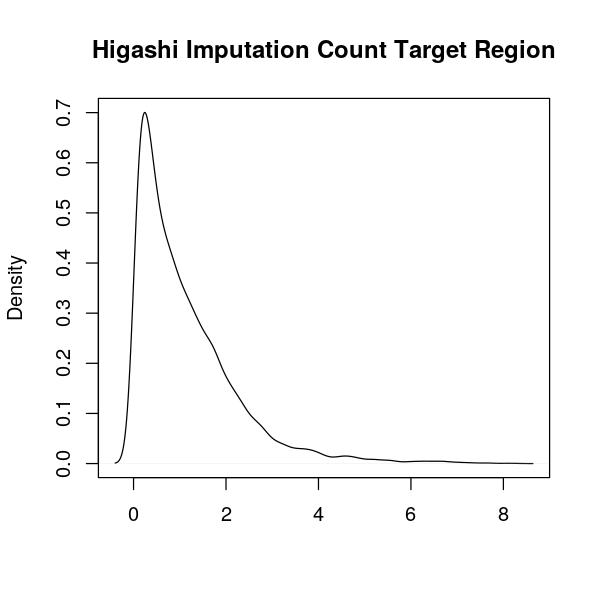

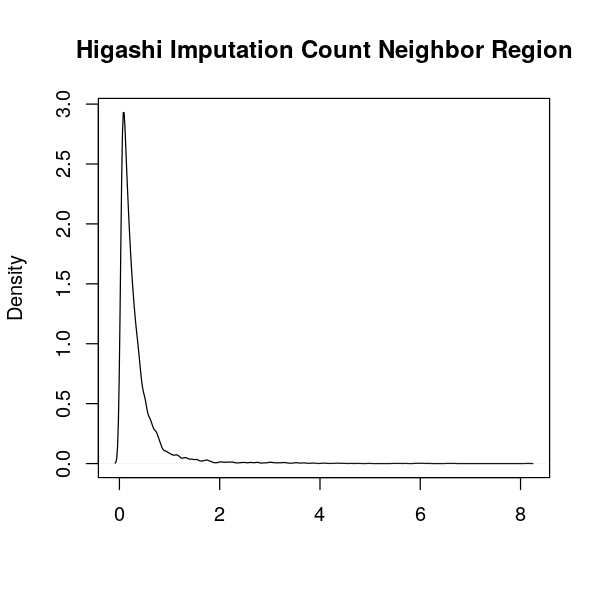

In [18]:
options(repr.plot.width=5, repr.plot.height=5)
plot(density(higashi_summary$outlier), main = "Higashi Imputation Count Target Region", xlab = "")
plot(density(higashi_summary$outlier2), main = "Higashi Imputation Count Neighbor Region", xlab = "")

Warning message:
“Using size for a discrete variable is not advised.”


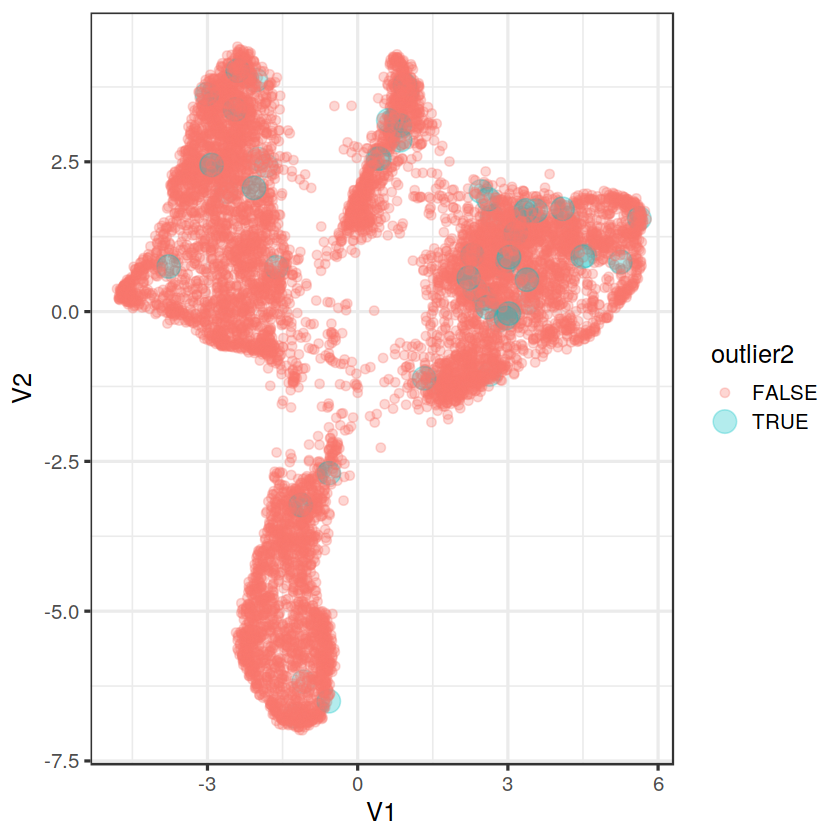

In [40]:
higashi_summary$outlier3 = higashi_summary$outlier > 6
ggplot(higashi_summary, aes(x = V1, y = V2, col = outlier3)) + geom_point(aes(size = outlier3), alpha = 0.3) + theme_bw(base_size = 15)

In [68]:
library(rhdf5)
library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)

chr = 1
higashi_summary = fread("/Duan2020/duan2020_summary.txt")

files = list.files("/Duan2020/Counts_1mb/", full.names = TRUE, recursive = TRUE)
higashi_summary$outlier = 0
higashi_summary$outlier2 = 0
for (i in 1:9230){
    temp = fread(files[i])
    temp = temp[V1 == "chr1"]
    temp$V2 = temp$V2 / 1000000
    temp$V4 = temp$V4 / 1000000
    higashi_summary$outlier[i] = sum(temp[temp$V2 > 7 & temp$V2 < 12 & temp$V4 > 109 & temp$V4 < 114, ]$V5)
    higashi_summary$outlier2[i] = sum(temp[temp$V2 > 13 & temp$V2 < 18 & temp$V4 > 109 & temp$V4 < 114, ]$V5)
}


In [73]:
higashi_summary[higashi_summary$name == "human_10993_TACACCGG-TCAGATGC_500000.matrix", ]

name,batch,depth,sparsity,cell_type,outlier,outlier2
<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>
human_10993_TACACCGG-TCAGATGC_500000.matrix,HFF-GM12878.R1,9131,5377,GM12878,1,2


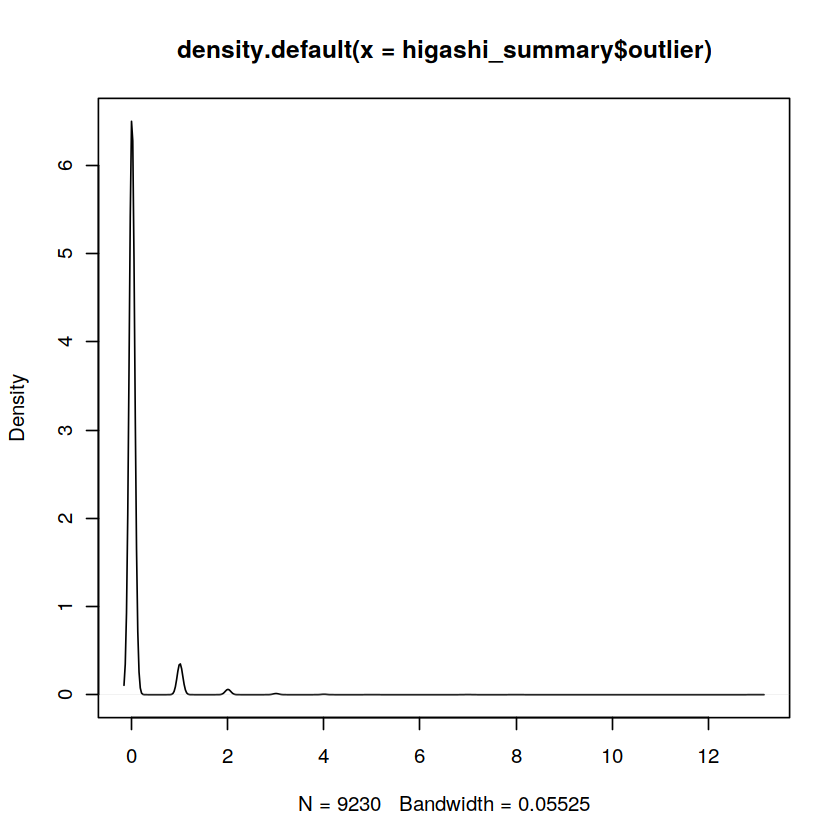

Warning message:
“Using size for a discrete variable is not advised.”


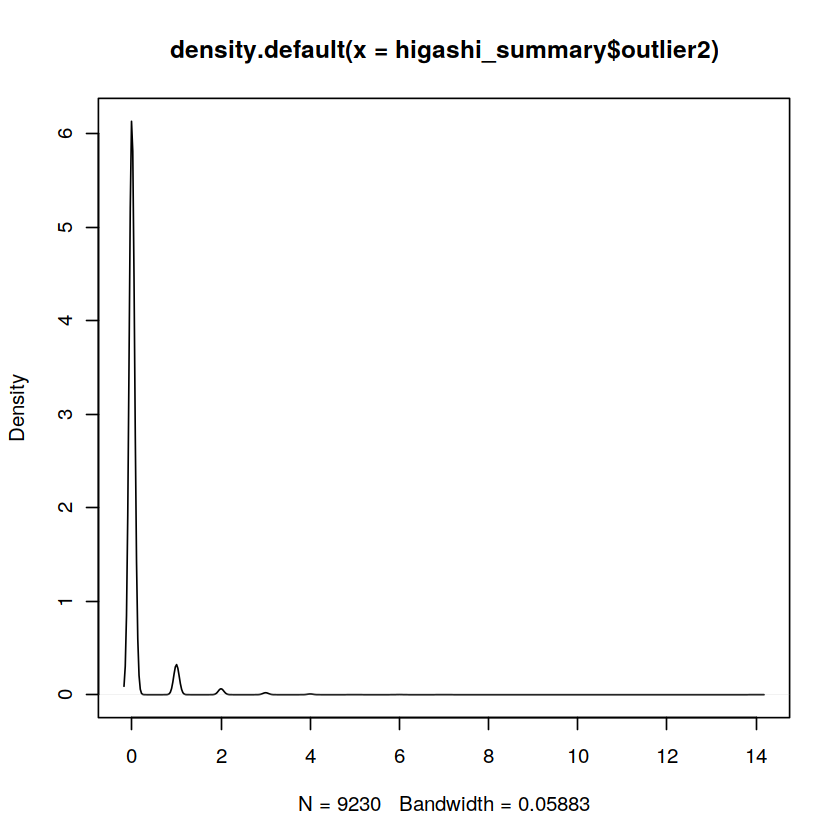

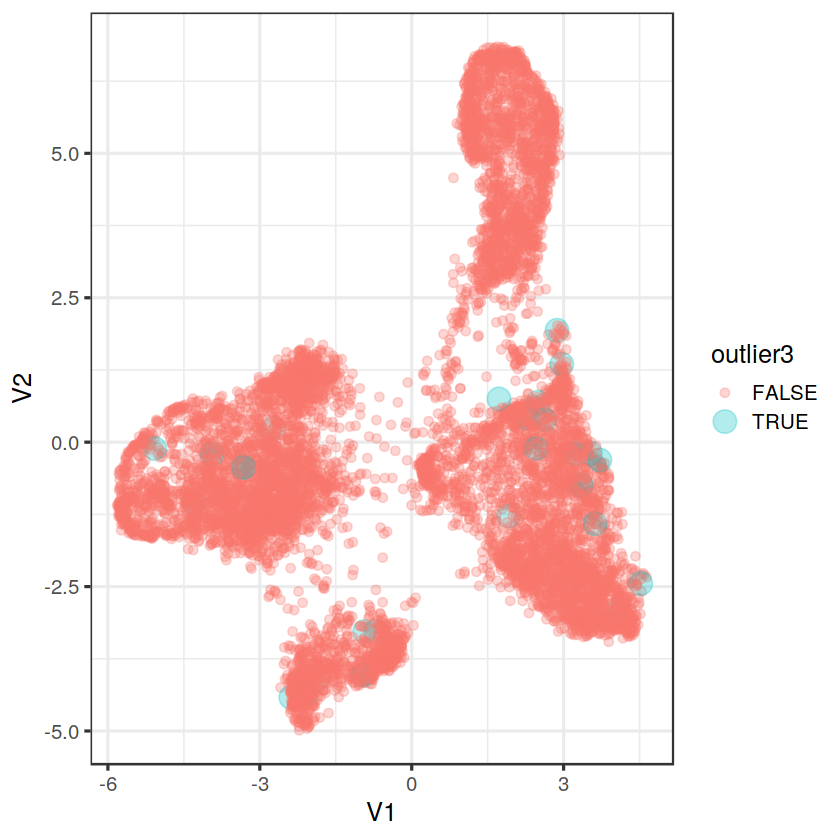

In [62]:
higashi_summary = higashi_summary[, 1:7]
emb = fread("/BandNormPaper/paper_prep/01072022/embeddings/Kim2020_higashi.csv")
library(umap)
library(ggplot2)
higashi_summary = cbind(higashi_summary, umap(emb)$layout)
plot(density(higashi_summary$outlier))
plot(density(higashi_summary$outlier2))
higashi_summary$outlier3 = higashi_summary$outlier > 2
ggplot(higashi_summary, aes(x = V1, y = V2, col = outlier3)) + geom_point(aes(size = outlier3), alpha = 0.3) + theme_bw(base_size = 15)

In [1]:
library(magrittr)
library(rhdf5)
library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)
library(umap)
library(ggplot2)
library(viridis)
library(rhdf5)
library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: viridisLite



In [2]:
## step1 generate outlier list

chr = 1
higashi_summary = fread("/Duan2020/duan2020_summary.txt")

files = list.files("/Duan2020/Counts_1mb/", full.names = TRUE, recursive = TRUE)
higashi_summary$outlier = 0
higashi_summary$outlier2 = 0
for (i in 1:9230){
    temp = fread(files[i])
    temp = temp[V1 == "chr1"]
    temp$V2 = temp$V2 / 1000000
    temp$V4 = temp$V4 / 1000000
    higashi_summary$outlier[i] = sum(temp[temp$V2 > 7 & temp$V2 < 12 & temp$V4 > 109 & temp$V4 < 114, ]$V5)
    higashi_summary$outlier2[i] = sum(temp[temp$V2 > 13 & temp$V2 < 18 & temp$V4 > 109 & temp$V4 < 114, ]$V5)
}


In [3]:
higashi_summary = higashi_summary[, 1:7]
emb = fread("/BandNormPaper/paper_prep/01072022/embeddings/Kim2020_higashi.csv")

higashi_summary = cbind(higashi_summary, umap(emb)$layout)
higashi_summary$outlierIndicator = higashi_summary$outlier > 1

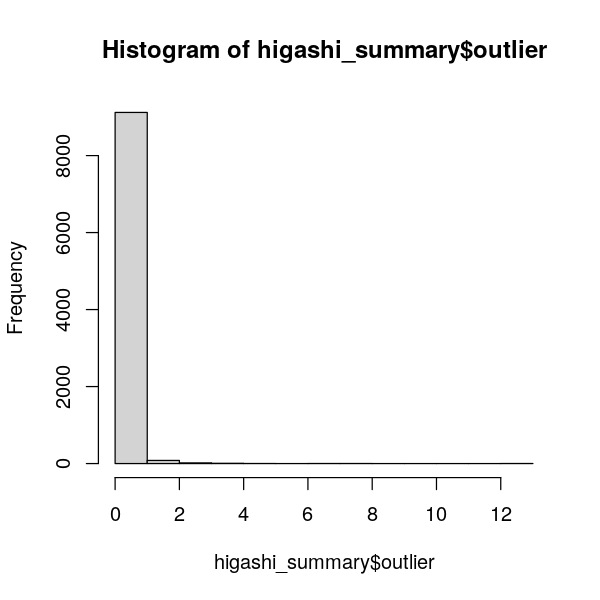

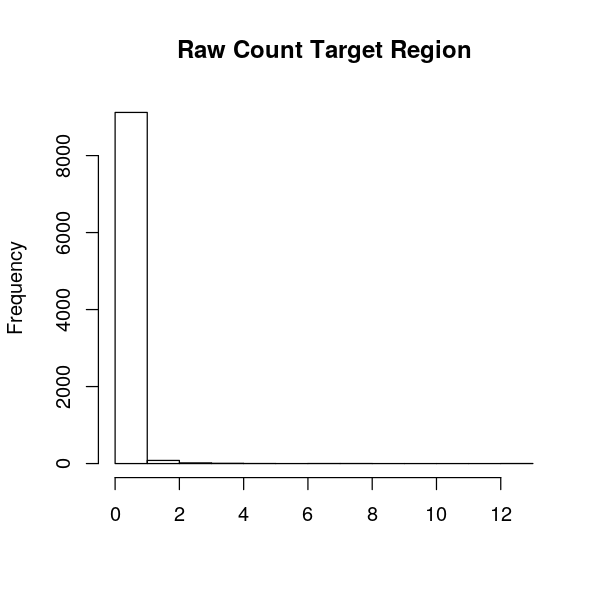

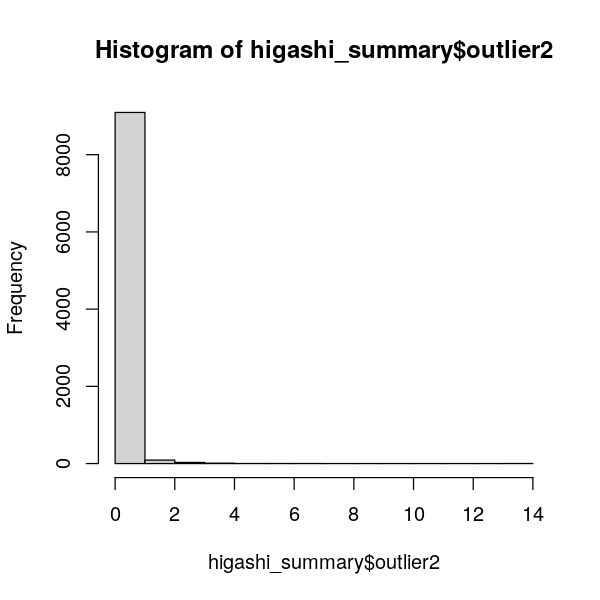

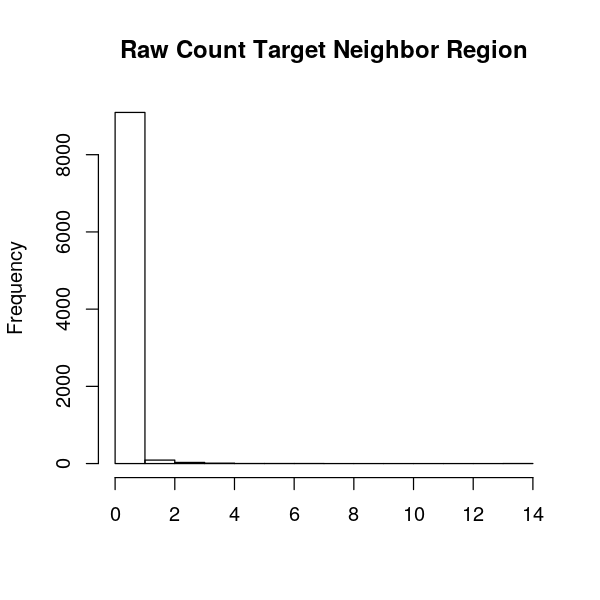

In [7]:
options(repr.plot.width=5, repr.plot.height=5)
plot(hist(higashi_summary$outlier), main = "Raw Count Target Region", xlab = "")
plot(hist(higashi_summary$outlier2), main = "Raw Count Target Neighbor Region", xlab = "")


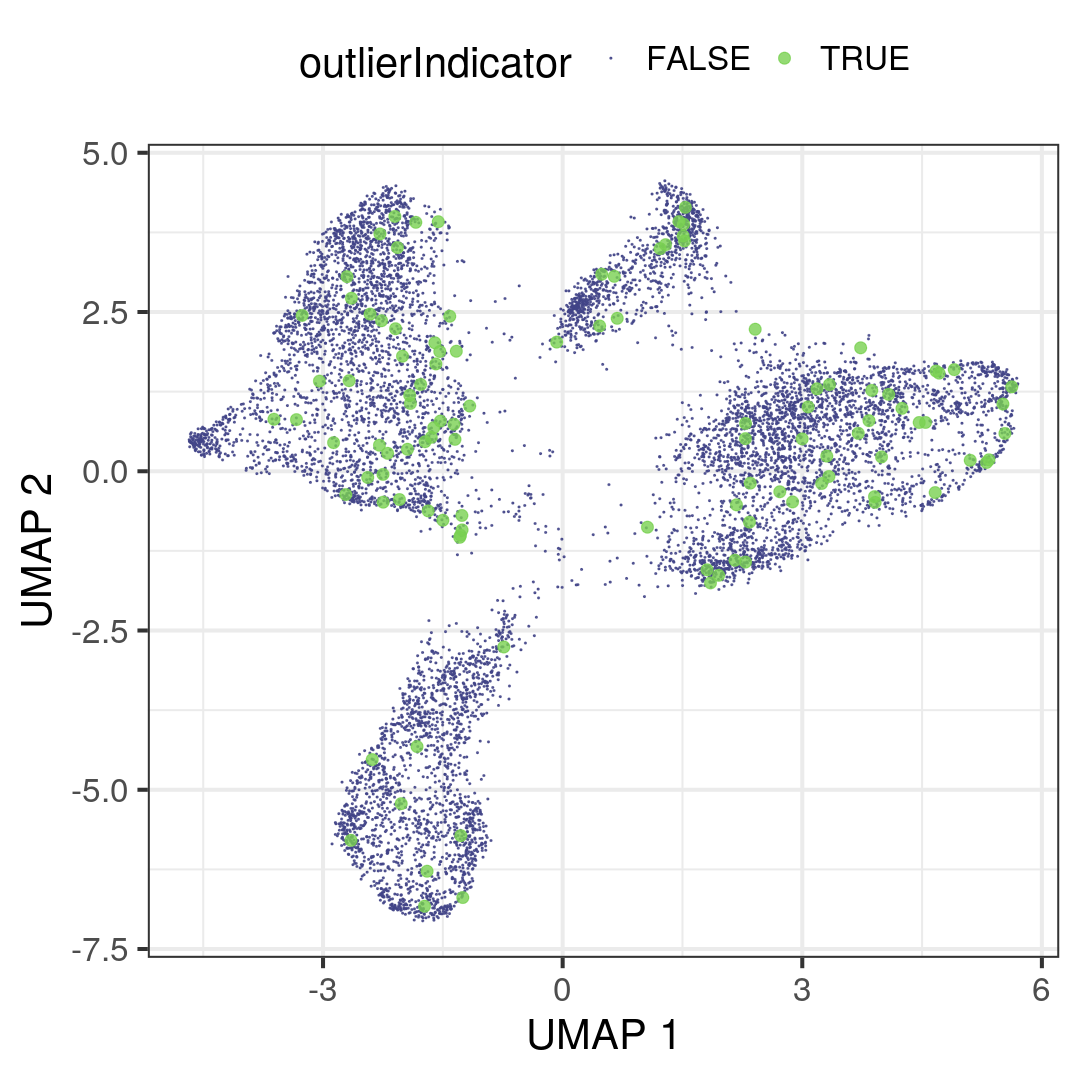

In [9]:
options(repr.plot.width=9, repr.plot.height=9)
ggplot(higashi_summary %>% arrange(outlierIndicator), aes(x = V1, y = V2, col = outlierIndicator, fill = outlierIndicator, shape = outlierIndicator, size = outlierIndicator)) + 
geom_point(alpha = 0.8) + 
theme_bw(base_size = 25) +
scale_shape_manual(values = c(20, 21)) +
scale_size_manual(values = c(0.5, 3)) +
scale_color_viridis(discrete = TRUE, begin = 0.2, end = 0.8) +
scale_fill_viridis(discrete = TRUE, begin = 0.2, end = 0.8) +
theme(legend.position = "top") +
xlab("UMAP 1") +
ylab("UMAP 2")

In [41]:
higashi_summary %>% arrange(-outlier) %>% head(20)
higashi_summary %>% dplyr::filter(name == "human_10993_TACACCGG-TCAGATGC_500000.matrix")

name,batch,depth,sparsity,cell_type,outlier,outlier2,V1,V2,outlierIndicator
<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
human_2356471_CCAGCGCG-TCAGATGC_500000.matrix,H1Esc-HFF.R1,2010884,114705,H1Esc,13,14,-1.7928308,-0.83649276,TRUE
human_5516_GTGAACGG-ACCTCTTG_500000.matrix,H1Esc-HFF.R1,4704,3449,HFF,8,4,0.4502507,2.21608972,TRUE
human_14776_ATCGAGCC-ATACATGT_500000.matrix,H1Esc.R2,11689,6009,H1Esc,7,0,-1.7317038,3.92286194,TRUE
human_36944_CAGGCTTG-ACTGCTAC_500000.matrix,H1Esc-HFF.R2,33472,8593,H1Esc,7,0,-1.2836100,3.79534794,TRUE
human_405470_CGTCTCGT-TCGTGAAG_500000.matrix,HFF-GM12878.R2,341813,56580,HFF,5,3,0.9158257,3.62043328,TRUE
human_14626_CCGGTGGT-ACAGACTG_500000.matrix,HFF-GM12878.R1,11950,6615,GM12878,4,0,4.4613672,0.93967797,TRUE
human_21748_CCGGTGGT-ACAGACTG_500000.matrix,HFF-GM12878.R2,18068,9049,GM12878,4,0,3.9689402,-0.01866847,TRUE
human_1152493_ATCGAGCC-TCAGATGC_500000.matrix,H1Esc-HFF.R1,1059854,68376,H1Esc,4,1,-1.4997552,-1.06521188,TRUE
human_21806_CCTGGCAG-TAATTACG_500000.matrix,H1Esc-HFF.R1,16879,8427,H1Esc,4,0,-1.9128477,0.59527711,TRUE


name,batch,depth,sparsity,cell_type,outlier,outlier2,V1,V2,outlierIndicator
<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
human_10993_TACACCGG-TCAGATGC_500000.matrix,HFF-GM12878.R1,9131,5377,GM12878,1,2,4.489888,1.021307,FALSE


In [4]:
## outlier cells
higashi_summary %>% arrange(-outlier) %>% head
outlier_cell_list = higashi_summary %>% arrange(-outlier) %>% head(10) %$% name
outlier_celltype_list = higashi_summary %>% arrange(-outlier) %>% head(10) %$% cell_type

name,batch,depth,sparsity,cell_type,outlier,outlier2,V1,V2,outlierIndicator
<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
human_2356471_CCAGCGCG-TCAGATGC_500000.matrix,H1Esc-HFF.R1,2010884,114705,H1Esc,13,14,-1.7928308,-0.8364928,TRUE
human_5516_GTGAACGG-ACCTCTTG_500000.matrix,H1Esc-HFF.R1,4704,3449,HFF,8,4,0.4502507,2.2160897,TRUE
human_14776_ATCGAGCC-ATACATGT_500000.matrix,H1Esc.R2,11689,6009,H1Esc,7,0,-1.7317038,3.9228619,TRUE
human_36944_CAGGCTTG-ACTGCTAC_500000.matrix,H1Esc-HFF.R2,33472,8593,H1Esc,7,0,-1.2836100,3.7953479,TRUE
human_405470_CGTCTCGT-TCGTGAAG_500000.matrix,HFF-GM12878.R2,341813,56580,HFF,5,3,0.9158257,3.6204333,TRUE
human_14626_CCGGTGGT-ACAGACTG_500000.matrix,HFF-GM12878.R1,11950,6615,GM12878,4,0,4.4613672,0.9396780,TRUE


In [ ]:
## zero contact count cells
higashi_summary %>% arrange(outlier, -depth) %>% head(20)
outlier_cell_list = higashi_summary %>% arrange(outlier, -depth) %>% head(20) %$% name
outlier_celltype_list = higashi_summary %>% arrange(outlier, -depth) %>% head(20) %$% cell_type

In [54]:
## zero contact count cells
higashi_summary %>% arrange(outlier) %>% head(10)
outlier_cell_list = higashi_summary %>% arrange(outlier) %>% head(10) %$% name
outlier_celltype_list = higashi_summary %>% arrange(outlier) %>% head(10) %$% cell_type

name,batch,depth,sparsity,cell_type,outlier,outlier2,V1,V2,outlierIndicator
<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
human_10009_CGATGCTC-ACTCTACG_500000.matrix,HFF-GM12878.R2,8697,5110,GM12878,0,0,5.030973,-0.49319964,FALSE
human_10017_CCGGTGGT-CGAATTGC_500000.matrix,HFF-GM12878.R2,8060,5516,GM12878,0,0,3.262196,0.81242664,FALSE
human_100251_GCTGAGAC-TACTAAGC_500000.matrix,HFF-GM12878.R1,63944,23229,GM12878,0,0,3.114878,-0.23932872,FALSE
human_10028_CCGCTACG-TTGACCAT_500000.matrix,HFF-GM12878.R1,8446,5361,GM12878,0,0,2.415463,1.19572190,FALSE
human_10031_CGCATGGC-CGAATTGC_500000.matrix,GM12878_IMR90.R1,8664,4856,GM12878,0,0,5.627503,0.99744217,FALSE
human_10032_TTGTGCCG-CAGTCCAA_500000.matrix,HFF-GM12878.R2,8311,5707,GM12878,0,0,2.964849,-0.19911297,FALSE
human_10044_CGACATGG-GATTGCAG_500000.matrix,HFF-GM12878.R1,8632,5070,GM12878,0,0,5.141129,-0.41611225,FALSE
human_10065_GACCGAAG-TGACCTTG_500000.matrix,HFF-GM12878.R2,7567,5479,GM12878,0,0,1.785048,-0.03801618,FALSE
human_10067_TGGAGAGG-AAGAGCTG_500000.matrix,HFF-GM12878.R1,8413,5676,GM12878,0,0,3.161655,0.04181873,FALSE


In [55]:
options(scipen = 200)

chr = 1
cells = paste("cell_", 0:9229, sep = "")
coordinates = t(h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                              chr, "_duan_embed_nbr_3_impute.hdf5"), "coordinates"))

for(cell_name in outlier_cell_list){
    i = which(higashi_summary$name == cell_name)

    values = h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                       chr, "_duan_embed_nbr_3_impute.hdf5"), cells[i])
    temp = data.frame(cbind(coordinates, values))
    temp$V1 = temp$V1 * 1000000
    temp$V2 = temp$V2 * 1000000
    write.table(data.frame(0, "chr1", temp$V1, 0, 1, "chr1", temp$V2, 1, temp$values), 
                file = paste0("/BandNormPaper/Higashioutlier/Higashi_Impute/", cell_name, ".bed"), row.names = FALSE,
                col.names = FALSE, quote = FALSE, sep = "\t")
    convert_bam_to_wig <- paste0("java -jar /Softwares/juicer_tools_1.22.01.jar pre -r 1000000 /BandNormPaper/Higashioutlier/Higashi_Impute/", cell_name, ".bed /BandNormPaper/Higashioutlier/Higashi_Impute/", cell_name, ".hic /HiC_essentialData/hg19.chrom.sizes.short")
    system(convert_bam_to_wig)

}
h5closeAll()

In [56]:
## Raw Count
options(scipen = 200)

for(j in 1:length(outlier_cell_list)){
    cell_name = outlier_cell_list[j]
    cell_type = outlier_celltype_list[j]
    
    temp = fread(paste0("/Duan2020/Counts_1mb/", cell_type, "/", cell_name))[V1 == "chr1"]
    write.table(data.frame(0, "chr1", temp$V2, 0, 1, "chr1", temp$V4, 1, temp$V5), 
            file = paste0("/BandNormPaper/Higashioutlier/Raw_Count/", cell_name, ".bed"), row.names = FALSE,
            col.names = FALSE, quote = FALSE, sep = "\t")
    convert_bam_to_wig <- paste0("java -jar /Softwares/juicer_tools_1.22.01.jar pre -r 1000000 /BandNormPaper/Higashioutlier/Raw_Count/", cell_name, ".bed /BandNormPaper/Higashioutlier/Raw_Count/", cell_name, ".hic /HiC_essentialData/hg19.chrom.sizes.short")
    system(convert_bam_to_wig)

}


In [57]:
## BandNorm
options(scipen = 200)

for(j in 1:length(outlier_cell_list)){
    cell_name = outlier_cell_list[j]
    cell_type = outlier_celltype_list[j]
    
    temp = fread(paste0("/Duan2020/Counts_1mb_bandnorm/", cell_name))[V1 == "chr1"]
    write.table(data.frame(0, "chr1", temp$V2, 0, 1, "chr1", temp$V4, 1, temp$V5), 
            file = paste0("/BandNormPaper/Higashioutlier/BandNorm/", cell_name, ".bed"), row.names = FALSE,
            col.names = FALSE, quote = FALSE, sep = "\t")
    convert_bam_to_wig <- paste0("java -jar /Softwares/juicer_tools_1.22.01.jar pre -r 1000000 /BandNormPaper/Higashioutlier/BandNorm/", cell_name, ".bed /BandNormPaper/Higashioutlier/BandNorm/", cell_name, ".hic /HiC_essentialData/hg19.chrom.sizes.short")
    system(convert_bam_to_wig)

}


In [58]:
## scVI-3D
options(scipen = 200)
chrom_select = "chr1"
## band size
resolution = 1000000
chrom_size = fread("/HiC_essentialData/hg19.chrom.sizes.short")
chrom_bin_list = chrom_size %>% dplyr::mutate(binN = floor(V2/resolution) + 1)
binN = chrom_bin_list %>% dplyr::filter(V1 == chrom_select) %$% binN
## cell info
cell_name_list = readRDS("/Duan2020/3DVI_suppInfo/cellNameList.rds")



for(j in 1:length(outlier_cell_list)){
    cell_name = outlier_cell_list[j]
    cell_ind = which(cell_name_list == gsub("_500000.matrix", "", cell_name))
    impute_matrix = c()
    for(band_id in 1:binN){
        input_file = paste0("/Duan2020/3DVI_impute/rawBand", band_id, "_", chrom_select, "_3DVI_imputation_nLatent100FilterCell.csv")
        if(file.exists(input_file)){
            impute_band = fread(input_file)
            impute_band_ind = which(impute_band$V1 == paste0("cell", cell_ind))
            if(length(impute_band_ind) == 1){
                impute_matrix = data.frame(
                    strA = 0, 
                    chrA = chrom_select, 
                    binA = 1:(binN - band_id) * resolution - resolution, 
                    flagA = 0, 
                    strB = 1, 
                    chrB = chrom_select, 
                    binB = (1 + band_id):binN * resolution - resolution, 
                    flagB = 1, 
                    score = impute_band[impute_band_ind, -1] %>% as.vector %>% t) %>% rbind(impute_matrix, .)

            }else{
                print(paste0(cell_name, "-", band_id, ":", length(impute_band_ind)))
            }
        }
    }
    write.table(impute_matrix, 
            file = paste0("/BandNormPaper/Higashioutlier/scVI-3D/", cell_name, ".bed"), row.names = FALSE,
            col.names = FALSE, quote = FALSE, sep = "\t")
    convert_bam_to_wig <- paste0("java -jar /Softwares/juicer_tools_1.22.01.jar pre -r 1000000 /BandNormPaper/Higashioutlier/scVI-3D/", cell_name, ".bed /BandNormPaper/Higashioutlier/scVI-3D/", cell_name, ".hic /HiC_essentialData/hg19.chrom.sizes.short")
    system(convert_bam_to_wig)
    
}
# aggBand <- fread(paste0(csvPath, "rawBand", bandDist, "_", chromSelect, "_3DVI_imputation_nLatent100FilterCell.csv"), header = FALSE)
#                 cellInd <- gsub("cell", "", aggBand$V1) %>% as.numeric
#                 score <- aggBand[which(cellInd %in% indList[[cT]]), -1] %>% colSums
#                 aggBP <- data.frame(strA = 0, chrA = chromSelect, binA = 1:(chromBinN - bandDist) * resolution - resolution, flagA = 0, strB = 1, chrB = chromSelect, binB = (1+bandDist): chromBinN * resolution - resolution, flagB = 1, score = score) %>% rbind(aggBP, .)

[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-9:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-15:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-19:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-20:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-23:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-27:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-31:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-39:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-44:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-48:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-49:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-52:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-53:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-54:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-57:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-58:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-59:0"
[1] "human_10009_CGATGCTC-ACTCTACG_500000.matrix-60:0"
[1] "human_

In [35]:
 data.frame(
                    strA = 0, 
                    chrA = chrom_select, 
                    binA = 1:(binN - band_id) * resolution - resolution, 
                    flagA = 0, 
                    strB = 1, 
                    chrB = chrom_select, 
                    binB = (1 + band_id):binN * resolution - resolution, 
                    flagB = 1, 
                    score = impute_band[impute_band_ind, -1] %>% as.vector %>% t) 

,strA,chrA,binA,flagA,strB,chrB,binB,flagB,score
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
V2,0,chr1,0,0,1,chr1,1000000,1,0.2714737
V3,0,chr1,1000000,0,1,chr1,2000000,1,0.3311765
V4,0,chr1,2000000,0,1,chr1,3000000,1,0.8614041
V5,0,chr1,3000000,0,1,chr1,4000000,1,0.6005096
V6,0,chr1,4000000,0,1,chr1,5000000,1,1.5606916
V7,0,chr1,5000000,0,1,chr1,6000000,1,0.6264868
V8,0,chr1,6000000,0,1,chr1,7000000,1,0.8586479
V9,0,chr1,7000000,0,1,chr1,8000000,1,0.5814159
V10,0,chr1,8000000,0,1,chr1,9000000,1,0.5756063


In [36]:
impute_band[impute_band_ind, -1] 

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2714737,0.3311765,0.8614041,0.6005096,1.560692,0.6264868,0.8586479,0.5814159,0.5756063,0.7804647,⋯,0.7535867,0.7528892,0.4518409,0.3178408,0.9239463,0.5911331,0.8605559,0.5020229,0.4428061,0.2301292


In [1]:
## check zero neighbor
library(rhdf5)
library(dplyr)
library(Matrix)
library(mgcv)
library(data.table)

chr = 1
higashi_impute_summary = fread("/Duan2020/duan2020_summary.txt")
cells = paste("cell_", 0:9229, sep = "")
coordinates = t(h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                              chr, "_duan_embed_nbr_0_impute.hdf5"), "coordinates"))
higashi_impute_summary$outlier = 0
higashi_impute_summary$outlier2 = 0
for (i in 1:9230){
    values = h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                           chr, "_duan_embed_nbr_0_impute.hdf5"), cells[i])
    temp = cbind(coordinates, values)
    temp = data.frame(temp)
    temp = temp %>% mutate_at(c("V1", "V2", "values"), as.numeric) %>% rename(binA = V1, binB = V2, count = values)
    higashi_impute_summary$outlier[i] = sum(temp[temp$binA > 7 & temp$binA < 12 & temp$binB > 109 & temp$binB < 114, ]$count)
    higashi_impute_summary$outlier2[i] = sum(temp[temp$binA > 13 & temp$binA < 18 & temp$binB > 109 & temp$binB < 114, ]$count)
}
h5closeAll()
higashi_impute_summary = higashi_impute_summary[, 1:7]


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [4]:
higashi_impute_summary = higashi_summary

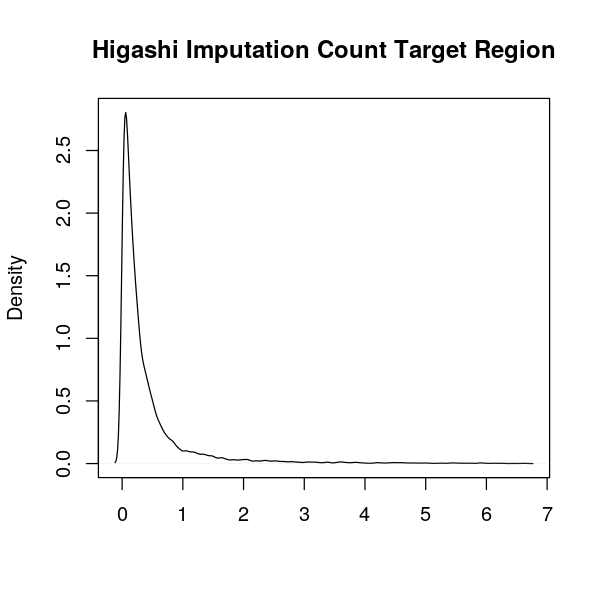

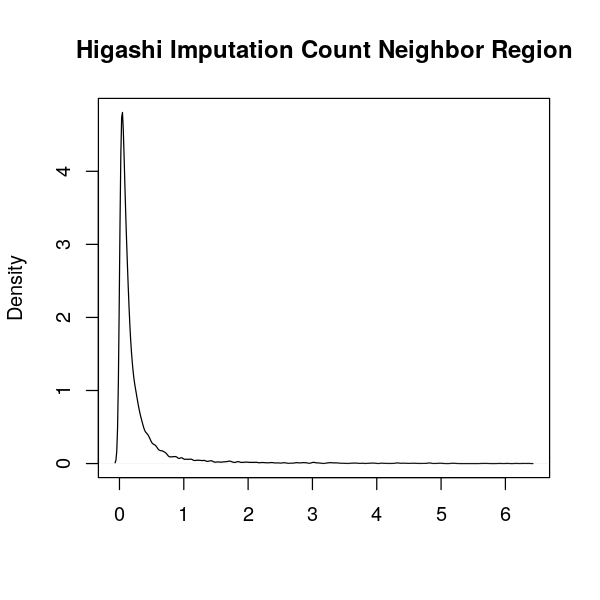

In [2]:
options(repr.plot.width=5, repr.plot.height=5)
plot(density(higashi_impute_summary$outlier), main = "Higashi Imputation Count Target Region", xlab = "")
plot(density(higashi_impute_summary$outlier2), main = "Higashi Imputation Count Neighbor Region", xlab = "")

In [3]:
## step1 generate outlier list

chr = 1
higashi_summary = fread("/Duan2020/duan2020_summary.txt")

files = list.files("/Duan2020/Counts_1mb/", full.names = TRUE, recursive = TRUE)
higashi_summary$outlier = 0
higashi_summary$outlier2 = 0
for (i in 1:9230){
    temp = fread(files[i])
    temp = temp[V1 == "chr1"]
    temp$V2 = temp$V2 / 1000000
    temp$V4 = temp$V4 / 1000000
    higashi_summary$outlier[i] = sum(temp[temp$V2 > 7 & temp$V2 < 12 & temp$V4 > 109 & temp$V4 < 114, ]$V5)
    higashi_summary$outlier2[i] = sum(temp[temp$V2 > 13 & temp$V2 < 18 & temp$V4 > 109 & temp$V4 < 114, ]$V5)
}


In [7]:
library(magrittr)
## zero contact count cells
higashi_summary %>% arrange(-outlier) %>% head(10)
outlier_cell_list = higashi_summary %>% arrange(-outlier) %>% head(10) %$% name
outlier_celltype_list = higashi_summary %>% arrange(-outlier) %>% head(10) %$% cell_type

name,batch,depth,sparsity,cell_type,outlier,outlier2
<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>
human_2356471_CCAGCGCG-TCAGATGC_500000.matrix,H1Esc-HFF.R1,2010884,114705,H1Esc,13,14
human_5516_GTGAACGG-ACCTCTTG_500000.matrix,H1Esc-HFF.R1,4704,3449,HFF,8,4
human_14776_ATCGAGCC-ATACATGT_500000.matrix,H1Esc.R2,11689,6009,H1Esc,7,0
human_36944_CAGGCTTG-ACTGCTAC_500000.matrix,H1Esc-HFF.R2,33472,8593,H1Esc,7,0
human_405470_CGTCTCGT-TCGTGAAG_500000.matrix,HFF-GM12878.R2,341813,56580,HFF,5,3
human_14626_CCGGTGGT-ACAGACTG_500000.matrix,HFF-GM12878.R1,11950,6615,GM12878,4,0
human_21748_CCGGTGGT-ACAGACTG_500000.matrix,HFF-GM12878.R2,18068,9049,GM12878,4,0
human_1152493_ATCGAGCC-TCAGATGC_500000.matrix,H1Esc-HFF.R1,1059854,68376,H1Esc,4,1
human_21806_CCTGGCAG-TAATTACG_500000.matrix,H1Esc-HFF.R1,16879,8427,H1Esc,4,0


In [8]:
options(scipen = 200)

chr = 1
cells = paste("cell_", 0:9229, sep = "")
coordinates = t(h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                              chr, "_duan_embed_nbr_0_impute.hdf5"), "coordinates"))

for(cell_name in outlier_cell_list){
    i = which(higashi_summary$name == cell_name)

    values = h5read(paste0("/Duan2020/higashi11132021/temp/chr", 
                       chr, "_duan_embed_nbr_0_impute.hdf5"), cells[i])
    temp = data.frame(cbind(coordinates, values))
    temp$V1 = temp$V1 * 1000000
    temp$V2 = temp$V2 * 1000000
    write.table(data.frame(0, "chr1", temp$V1, 0, 1, "chr1", temp$V2, 1, temp$values), 
                file = paste0("/BandNormPaper/Higashioutlier/Higashi_Impute/", cell_name, "_nbr0.bed"), row.names = FALSE,
                col.names = FALSE, quote = FALSE, sep = "\t")
    convert_bam_to_wig <- paste0("java -jar /Softwares/juicer_tools_1.22.01.jar pre -r 1000000 /BandNormPaper/Higashioutlier/Higashi_Impute/", cell_name, "_nbr0.bed /BandNormPaper/Higashioutlier/Higashi_Impute/", cell_name, "_nbr0.hic /HiC_essentialData/hg19.chrom.sizes.short")
    system(convert_bam_to_wig)

}
h5closeAll()